파이썬 머신러닝 완벽가이드 ch7. 5 ~ 7 (pg. 463~487)

---------------------
#07. 군집화 (Clustering)

####07-05. DBSCAN
- DBSCAN 개요
- DBSCAN 적용하기 - 붓꽃 데이터 세트
- DBSCAN 적용하기 - make_circles( ) 데이터 세트

####07-06. 군집화 실습 - 고객 세그먼테이션
- 고객 세그먼테이션의 정의와 기법
- 데이터 세트 로딩과 데이터 클렌징
- RFM 기반 데이터 가공
- RFM 기반 고객 세그먼테이션

####07-07. 정리
----

###07-05. DBSCAN
####**DBSCAN 개요**
**입실론 주변 영역**의 **최소 데이터 개수**를 포함하는 밀도 기준을 충족시키는 데이터를 핵심 포인트로 정하여, 핵심 포인트를 연결하면서 군집화를 구성하는 방식
- Density Based Spatial Clustering of Applications with Noise
- 밀도 기반 알고리즘
- 알고리즘을 통해  군집의 개수를 자동으로 지정. 특정 군집 개수를 강제하지 않음.
- 간단하고 직관적임.
-  특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하기 때문에 기하학적으로 복잡한 데이터 세트에서도 효과적인 군집화를 함.
- 입실론 주변 영역 포함 최소 데이터 개수 기준에 따라 아래와 같이 데이터 포인트를 정의
   - 핵심 포인트(Core Point) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있는 데이터
   - 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터
   - 경계 포인트(Border Point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
   - 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터



(예) P1에서 P12까지 12개의 데이터 세트에 대해서 DBSCAN 군집화를 적용. 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개로(자기 자신의 데이터를 포함) 가정함.

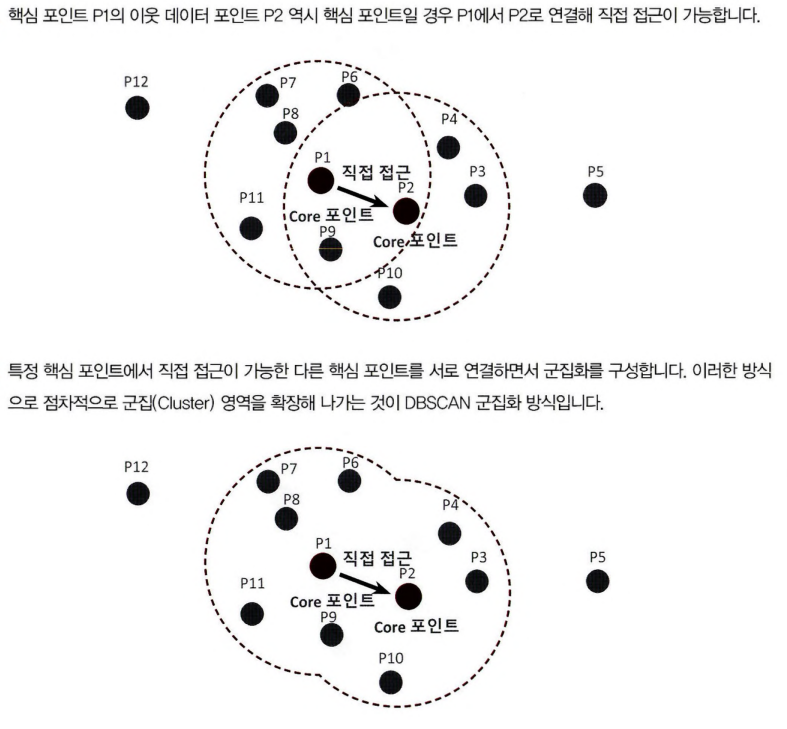

DBSCAN 군집화 적용 결과 데이터가 정의된 모습

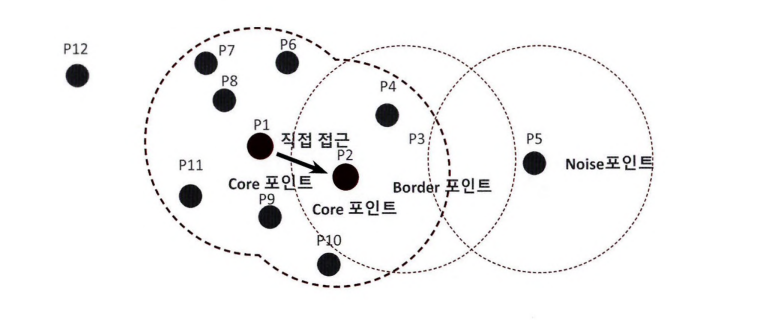

- 사이킷런 DBSCAN 클래스 : eps, min_samples 파라미터를 지정하면 알고리즘을 통해 군집의 개수를 자동으로 지정하기 때문에, eps과 min_samples 파라미터를 통해 최적의 군집을 찾는 것이 중요함.
      
   ```
from sklearn.cluster import DBSCAN
DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
```

   - eps
      - 입실론 주변 영역의 반경 크기. 일반적으로 1 이하의 값을 설정함.
      - eps값 증가 --> 반경이 커져 포함하는 데이터 수가 많아짐. --> 노이즈 데이터 수 감소
   -  min_samples  
      - 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수. 자신 데이터 포함.
      - min_samples값 증가 --> 반경 내에 더 많은 데이터 수를 포함시켜야함. --> 노이즈 데이터 수 증가






####**DBSCAN 적용하기 - 붓꽃 데이터 세트**
- 군집화 결과 -1 군집은 노이즈에 속함을 의미.
- Target의 유형이 3가지인데, 군집이 2개로 군집화되었다고 군집화 효율이 떨어진 것은 아님. 특히, 붓꽃 데이터 세트는 군집을 2개로 할 때 군집화의 효율로서 더 좋은 면이 있음.



In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels

## 0과 1로 두 개의 군집으로 군집화됨.
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker='$%d$' % label)

    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

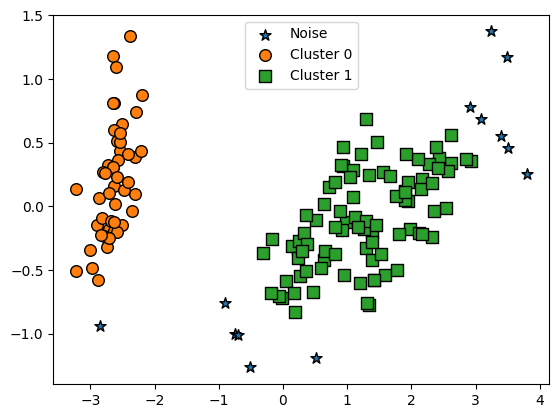

In [ ]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해서 PCA n_components=2로 피처 데이터 세트 변환하기
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_plot() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성함.
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


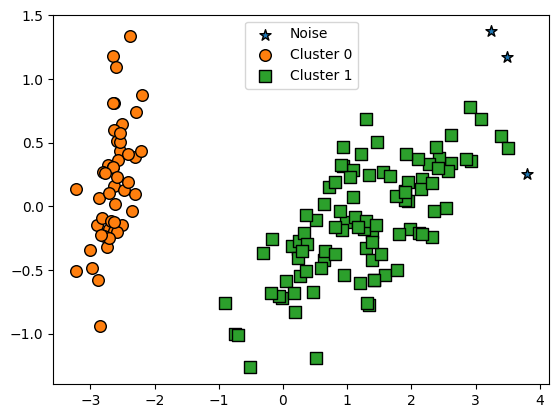

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

## 노이즈 군집인 -1이 3개밖에 없음. eps 파라미터를 기존의 0.6에서 0.8로 증가시켰더니 노이즈 데이터의 개수가 감소함.
## 기존의 eps가 0.6일 때 노이즈로 분류되었던 데이터가 eps 반경이 커지면서 Cluster1로 소속된 것.
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


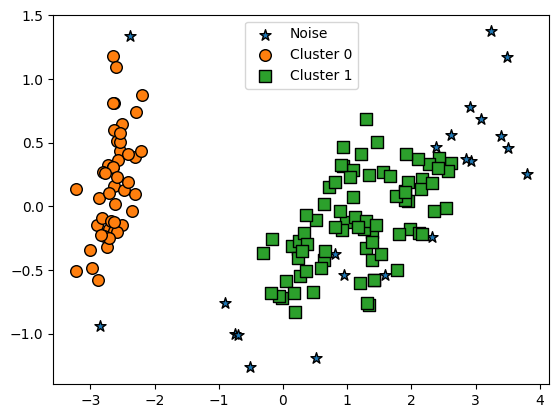

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

## min_samples 파라미터를 8에서 16으로 증가시켰더니 노이즈 개수가 많이 증가함.
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

####**DBSCAN 적용하기 - make_circles( ) 데이터 세트**
- make_circles( ) 함수
```
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=O.5)
```
   - 내부 원과 외부 원으로 구분되는 데이터 세트를 생성하는 코드
   - 오직 2개만의 피처를 생성함. 별도의 피처 개수 설정 필요 X.
   - noise : 노이즈 데이터 세트의 비율
   - factor : 외부 원과 내부 원의 scale 비율

- KMeans : 거리 기반 군집화론 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾기 어려움.

   GMM : 일렬로 늘어선 데이터 세트에선 효과적이었으나, 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에선 아님.

   DBSCAN : 원하는 방향으로 군집화됨.


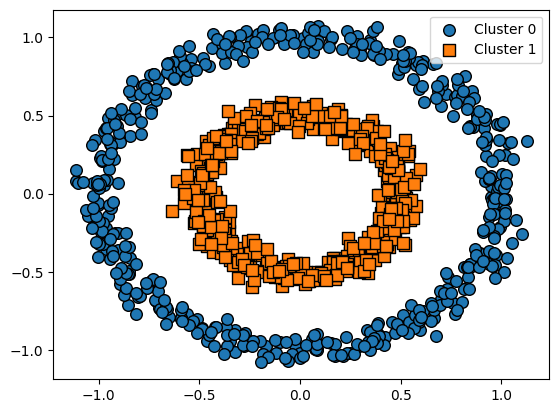

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

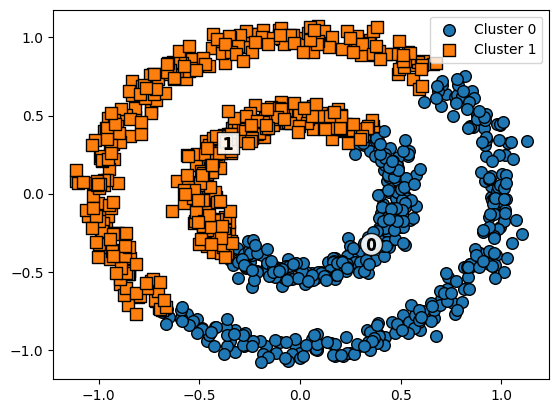

In [ ]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행하기
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

## 위와 아래 절반으로 군집화됨. 거리 기반 군집화론 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾기 어려움.
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

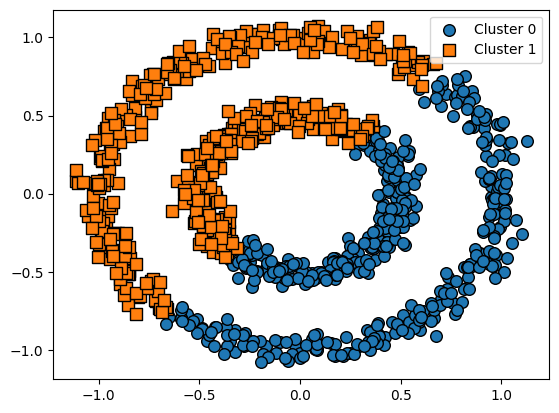

In [ ]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행하기
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

## GMM도 내부와 외부의 원형으로 구성된 복잡한 형태의 데이터 세트에선 군집화 수행을 잘 못함.
visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

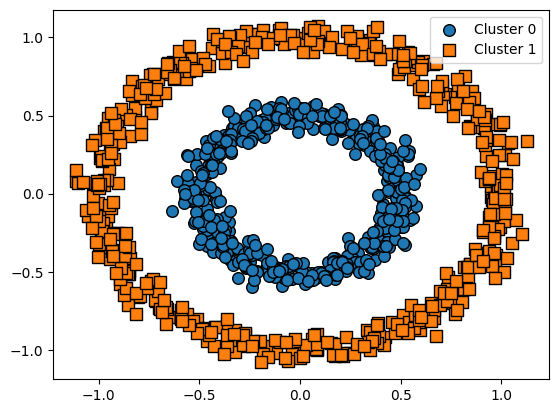

In [ ]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행하기
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

## DBSCAN으로 원하는 방향으로 정확히 군집화됨.
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

###07-06. 군집화 실습 - 고객 세그먼테이션
####**고객 세그먼테이션의 정의와 기법**
- Customer Segmentation
- 다양한 기준으로 고객을 분류하는 기법
- 주요 목표는 타깃 마케팅
   - 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅 및 서비스를 제공하는 것.
- RFM 기법
   - 가장 기본적인 고객 분석 요소
   - 고객을 군집화할 때 기준이 되는 고객의 요소들
   - **Recency(R) : 가장 최근 상품 구입일에서 오늘까지의 기간**
   - **Frequency(F) : 상품 구매 횟수**
   - **Monetary Value(M) : 총 구매 금액**

####**데이터 세트 로딩과 데이터 클렌징**


In [27]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='/content/drive/MyDrive/ESAA_YB/Datasets/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


####<피처 설명>
- InvoiceNo	: 주문번호. 'C'로 시작하는 것은 최소 주문.
- StockCode	: 제품 코드
- Description	: 제품 설명
- Quantity : 주문 제품 건수
- InvoiceDate	: 주문 일자
- UnitPrice	: 제품 단가
- CustomerID : 고객 번호
- Country : 주문 고객의 국적

In [28]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**전처리1**

 CustomerID에 Null값, UnitPrice와 Quantity가 음수인 오류값이 존재함.


-->  Quantity > 0 , UnitPrice > 0 , CustomerID가 Null이 아닌 데이터를 제외하고 전부 삭제 (불린 인덱싱 이용)

In [29]:
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
## 전체 데이터가 541909개에서 397884개로 줄어듦.
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


**전처리2**

 주요 주문 고객은 영국 국적임.

   --> Country가 영국이 아닌 다른 국가의 데이터는 모두 제외

In [30]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [31]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
## 최종 데이터 개수는 354321개.
print(retail_df.shape)

(354321, 8)


####**RFM 기반 데이터 가공**


In [32]:
# 'UnitPrice'와 'Quantity'를 곱해서 주문 금액 데이터 생성
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
# 더 편리한 식별성을 위해 CustomerID float형을 int형으로 변환
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

<ipython-input-32-39a001ea4c8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
<ipython-input-32-39a001ea4c8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)


In [33]:
# Top5 주문 건수을 가진 고객
print(retail_df['CustomerID'].value_counts()[:5])
# Top5 주문 금액(sale_amount)을 가진 고객
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])
## 몇몇 특정 고객이 많은 주문건수와 주문금액을 가지고 있음.

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [34]:
## 주어진 데이터 세트에선 주문번호 + 상품코드 레벨이 식별자이므로 InvoiceNo + StockCode로 groupby를 수행하면 1에 가깝게 유일한 식별자 레벨이 됨.
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

**기존의 주문번호 + 상품코드 기준의 데이터를**

**RFM 분석에 필요한 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경**

In [35]:
# DataFrame의 groupby() multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 칼럼의 max()에서 데이터 가공
# Frequency는 InvoiceNo 칼럼의 count(), Monetary value는 sale_amount 칼럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount': 'sum'
}

cust_df = retail_df.groupby(['CustomerID']).agg(aggregations)

# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns={'InvoiceDate': 'Recency',
                                  'InvoiceNo': 'Frequency',
                                  'sale_amount': 'Monetary'})
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [36]:
# 온라인 판매 데이터가 2010년 12월 1일에서 2011년 12월 9일까지의 데이터이므로 현재 날짜는 2011년 12월 10일로 간주
import datetime as dt

cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 수는', cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


####**RFM 기반 고객 세그먼테이션**

해당 온라인 판매 데이터 세트는 개인 고객 주문과 매우 큰 차이를 보이는 소매업체의 대규모 주문을 포함함.


이러한 왜곡도가 심한 데이터 세트를 군집화하는 경우,
- 군집화가 한쪽 군집에만 집중되는 현상이 발생.
- 왜곡된 데이터 값이 속한 군집이 포함하는 데이터의 개수가 너무 적고 광범위하게 퍼져있게 됨.  
- 이 경우, 군집의 수를 계속 늘려봐도 이 군집만 지속적으로 분리하게 되기에 의미 없는 군집화 결과로 이어지게 됨.
- 지나치게 왜곡된 데이터 세트의 군집 도출은 간단한 데이터 분석만으로도 충분히 도출이 가능한 지나치게 일반적인 군집화 결과임. 특이한 데이터 세트를 분리하려는 군집화의 근본 목표에 어긋남.

따라서, 전체 데이터의 왜곡 정도를 낮춘 후에 군집화를 적용하는 것인 바람직함.

(참고) 군집화를 평가할 땐 실루엣 스코어의 절대치보단, 개별 군집이 얼마나 균일하게 나뉠 수 있는지가 훨씬 중요함.



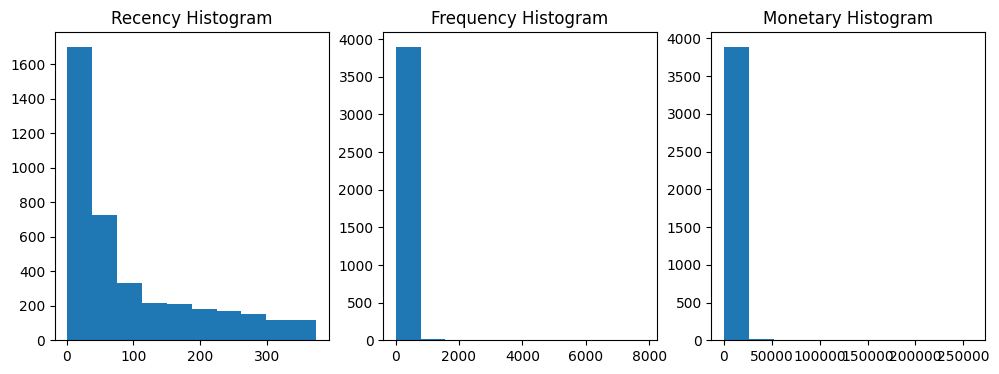

In [37]:
# 각 칼럼별 왜곡도를 히스토그램을 시각화해봄으로써 확인
## 세 칼럼 모두 매우 왜곡된 분포를 가짐. 특히 F와 M.
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
plt.show()

In [38]:
## mean이 중앙값보다 훨씬 큼. 왜곡이 max값 포함 상위 몇 개의 큰 값에 의한 것임.
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


**방법 1) StandardScaler로 평균과 표준편차를 재조정 --> K-means 적용**

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_labels'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.576


In [40]:
import matplotlib.cm as cm

def visualize_silhouette(cluster_lists, X_features):
    """
    여러 개의 군집 개수에 대해 KMeans 군집화와 실루엣 계수를 시각화합니다.

    Parameters:
    cluster_lists: list
        군집 개수로 사용할 정수 리스트 (예: [2, 3, 4, 5])
    X_features: array-like
        군집화에 사용할 피처 데이터 세트
    """
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(1, n_cols, figsize=(4 * n_cols, 6))

    if n_cols == 1:
        axs = [axs]  # 단일 subplot에도 리스트로 접근 가능하도록 처리

    for idx, n_clusters in enumerate(cluster_lists):
        # KMeans 모델 학습 및 예측
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X_features)

        # 실루엣 계수 계산
        silhouette_avg = silhouette_score(X_features, cluster_labels)
        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[idx].set_title(f"Clusters: {n_clusters}\nAvg Silhouette: {silhouette_avg:.2f}")
        axs[idx].set_xlim([-0.1, 1])
        axs[idx].set_ylim([0, len(X_features) + (n_clusters + 1) * 10])
        axs[idx].set_xlabel("Silhouette Coefficient Values")
        axs[idx].set_ylabel("Cluster Label")

        # 각 군집별 실루엣 계수 플롯
        for i in range(n_clusters):
            cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            cluster_silhouette_values.sort()

            size_cluster_i = cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            axs[idx].fill_betweenx(
                np.arange(y_lower, y_upper),
                0, cluster_silhouette_values,
                facecolor=color, edgecolor=color, alpha=0.7
            )

            axs[idx].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10은 클러스터 간의 공백

        axs[idx].axvline(x=silhouette_avg, color="red", linestyle="--")
        axs[idx].set_yticks([])  # y축 틱 제거
        axs[idx].set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.tight_layout()
    plt.show()

def visualize_kmeans_plot_multi(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels

        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']

        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))
        axs[ind].legend(loc='upper right')

    plt.show()

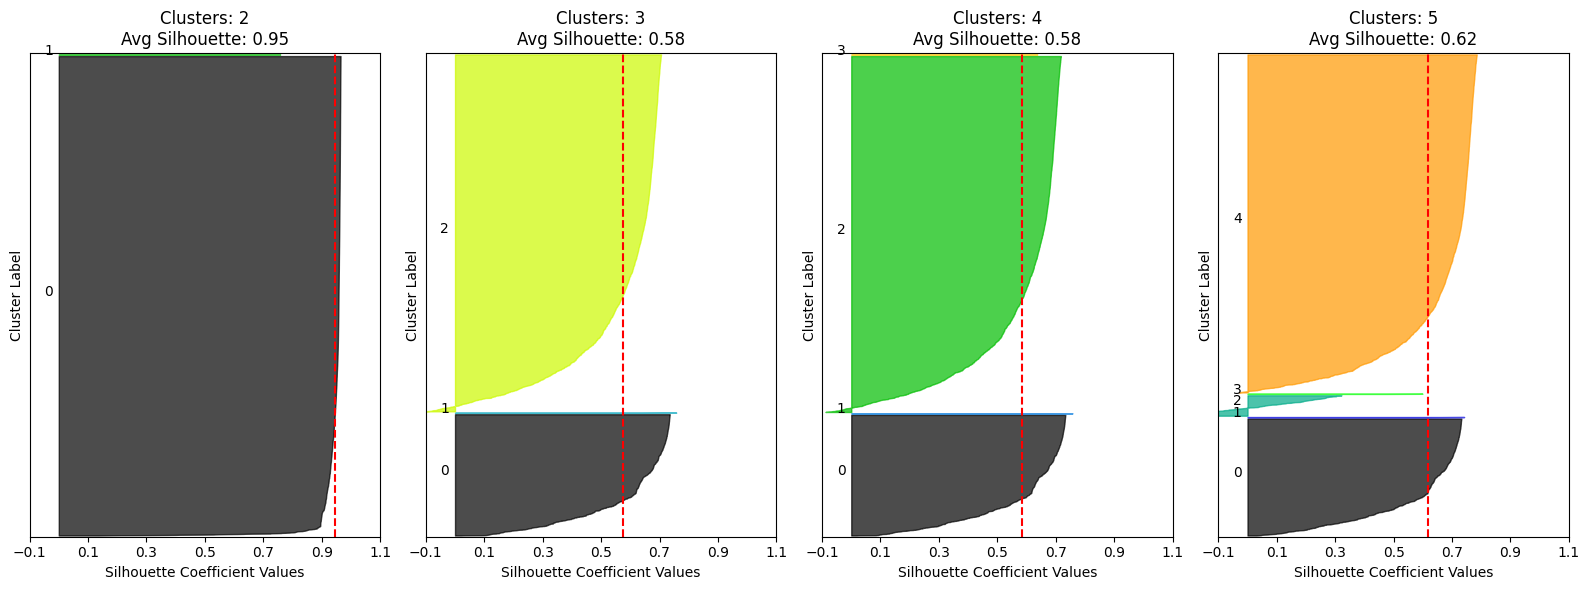

<ipython-input-40-30c5e8eb4bc4>:93: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
<ipython-input-40-30c5e8eb4bc4>:93: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


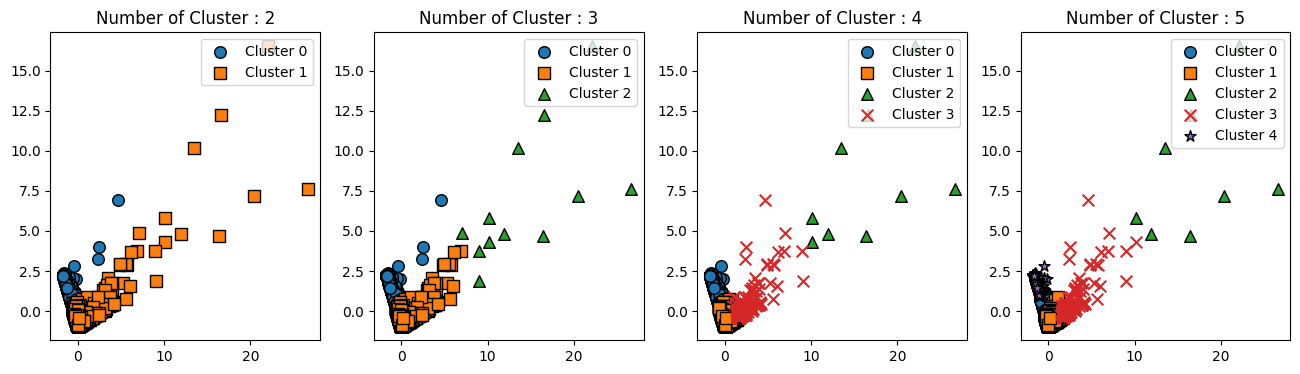

In [41]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

- 군집화 진행 후 각 군집별로 데이터가 균일하게 분포되어 있지 않음.
- 특정 군집에서 데이터가 너무 적거나 너무 광범위하게 퍼져 있음. 이는 특정 소매점의 대량 주문 구매 데이터.
- 데이터 세트 자체가 거리 기반으로 광범위하게 퍼져 있어서 군집 수를 늘려봐도 의미없는 결과로 이어짐.

**방법 2) 로그 변환을 하여 데이터 세트의 왜곡 정도를 낮춤**

**--> StandardScaler로 평균과 표준편차를 재조정**

**--> K-means 적용하여 군집화**

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequency, Monetary 칼럼에 np.log1p()로 로그변환
cust_df['Recency'] = np.log1p(cust_df['Recency'])
cust_df['Frequency'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df.values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 0.309


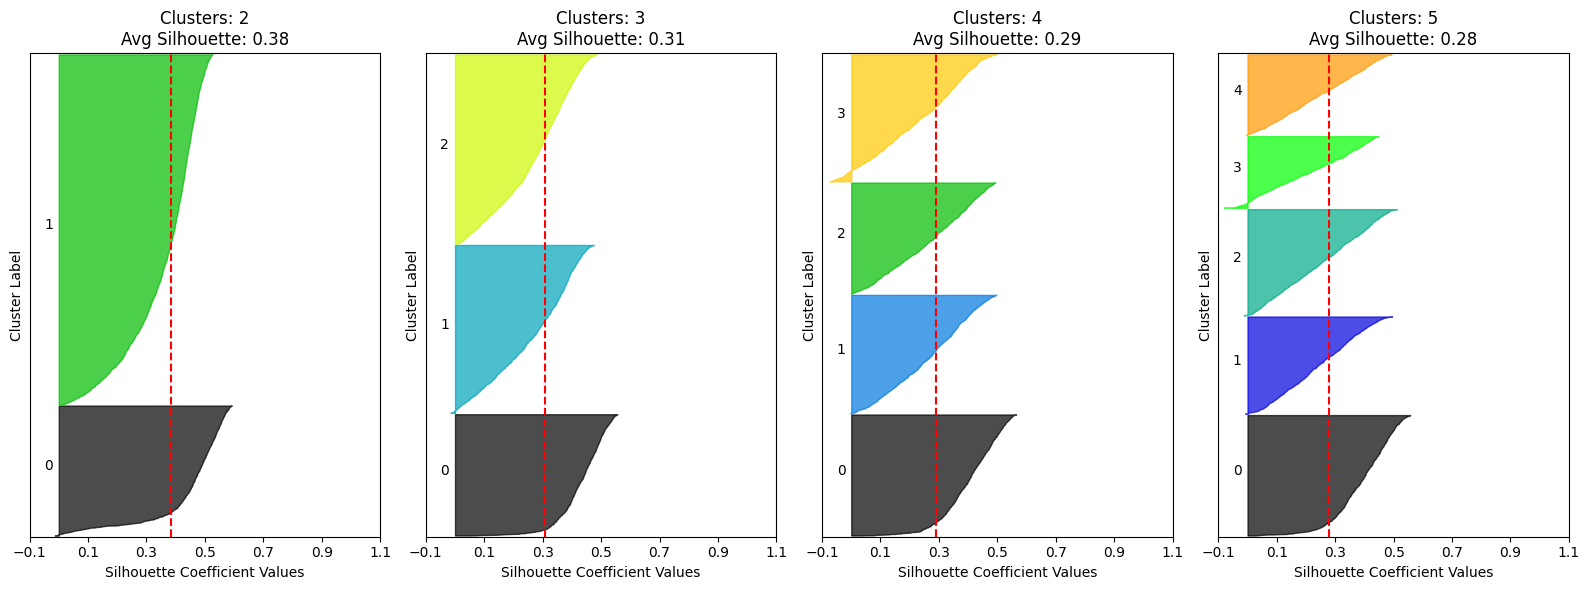

<ipython-input-40-30c5e8eb4bc4>:93: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
<ipython-input-40-30c5e8eb4bc4>:93: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


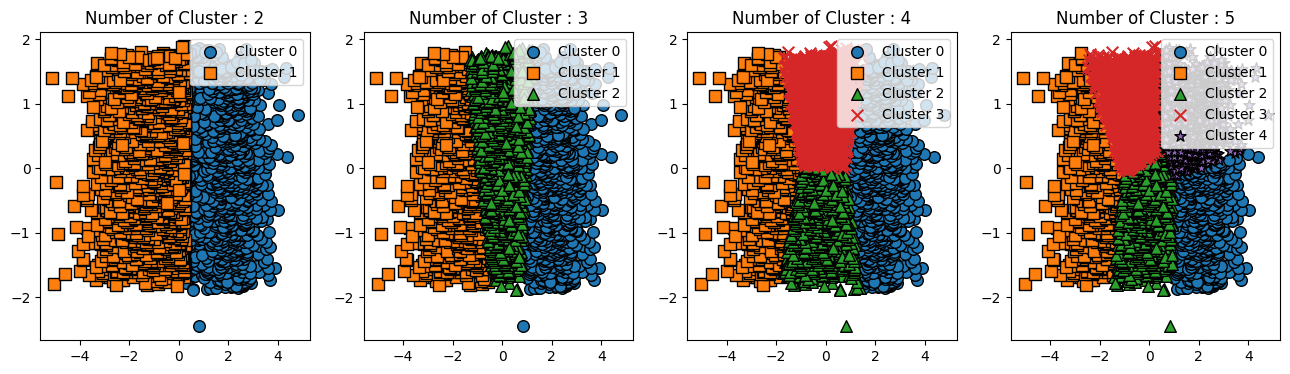

In [43]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

- 전체 실루엣 스코어는 로그변환하기 전보다 떨어짐.
- BUT, 데이터 개수와 밀집도 면에서 훨씬 더 균일하게 군집화가 구성됨.
- 따라서, 왜곡도가 심한 데이터의 경우 로그변환으로 일차가공 후 군집화를 수행하자.

###07-07. 정리

다양한 머신러닝 기반의 군집화 기법을 소개함. 각 군집화 기법은 나름의 장단점이 있으며, 군집화하려는 데이터의 특성에 맞게 선택해야 함.

- K-평균(KMeans)  
   - 거리 기반으로 군집 중심점을 이동시킴.
   - 군집 평가를 하기 위해 실루엣 계수 이용.
   - (+) 쉽고 직관적. 많이 사용됨.
   - (-) 복잡한 구조를 가지는 데이터 세트엔 적용이 어려움.

- 평균 이동(Mean Shift)
   - 데이터가 모여있는 밀도가 높은 쪽으로 군집 중심점을 이동시킴.
   - (+) 컴퓨터 비전 영역에서 특정 개체를 구분하거나 움직임을 추적하는데 뛰어남.
   - (-) 일반 업무 기반 정형 데이터 세트에선 덜 사용됨.
- GMM(Gaussian Mixture Model)
   - 데이터 세트가 여러 개의 가우시안 분포를 섞어서 생성된 모델이라는 가정.
   - 데이터 세트에서 서로 다른 정규분포 형태를 추출하여 각각을 하나의 군집으로 군집화.
   - (+) 보다 유연하게 다양한 데이터 세트에서 적용될 수 있음.
   - (-) 수행시간이 오래걸림.

- DBSCAN(Density Based Spatial Clustering of Applications with Noise)
   - 밀도 기반
   - 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화
   - (+) 간단하고 직관적. 데이터 분포가 기하학적으로 복잡해도 효과적.